step1: load and understand data



In [7]:
import pandas as pd
df=pd.read_csv("/content/YouTub.csv")
df

,video_id,channel_name,is_competitor,video_title,thumbnail_description,views,ctr,avg_watch_time_min,retention_30s,retention_1min,retention_50,upload_day,upload_time,video_length_min,content_type
0,V01,MyChannel,0,I Tried Waking Up at 5AM for 7 Days,Shocked face bold text THIS CHANGED ME,82000,8.4,6.2,72,64,48,Monday,18:00,10,Vlog
1,V02,MyChannel,0,Why Most People Fail at YouTube,Serious face red text HARD TRUTH,64000,9.1,5.1,68,60,42,Wednesday,20:00,9,Commentary
2,V03,MyChannel,0,How YouTube Algorithm Really Works,Clean design arrow pointing to graph,110000,10.5,7.8,80,74,60,Saturday,11:00,12,Tutorial
3,V04,MyChannel,0,I Uploaded Daily for 30 Days,Tired face yellow text EXHAUSTING,45000,7.2,3.9,55,48,30,Sunday,22:00,14,Vlog
4,V05,MyChannel,0,This Thumbnail Trick Boosted Views,Bold arrow before after image,97000,11.2,6.9,78,70,57,Friday,19:00,11,Tutorial
5,V06,MyChannel,0,Why My Last Video Failed,Confused face small text BIG MISTAKE,18000,6.1,2.8,42,35,18,Tuesday,23:30,8,Commentary
6,V07,MyChannel,0,How Much YouTubers Really Earn,Shocked face green money icons,130000,12.0,8.2,83,76,65,Saturday,10:30,13,Explainer
7,V08,MyChannel,0,I Copied a Viral Video Format,Split screen copied vs original,52000,8.9,4.5,60,52,35,Thursday,21:00,10,Experiment
8,V09,MyChannel,0,Stop Making These Editing Mistakes,Angry face bold red STOP,76000,9.6,6.0,74,66,50,Friday,18:30,9,Tutorial
9,V10,MyChannel,0,Why No One Clicks Your Videos,Plain thumbnail low contrast text,24000,5.4,2.5,40,32,15,Monday,23:45,7,Commentary


In [9]:
df.describe()

,is_competitor,views,ctr,avg_watch_time_min,retention_30s,retention_1min,retention_50,video_length_min
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.800000,116860.000000,10.634000,5.982000,69.600000,62.760000,48.440000,11.040000
std,0.404061,67594.532444,2.847456,2.033665,16.056024,16.578274,18.678985,1.851199
min,0.000000,18000.000000,5.200000,2.200000,38.000000,30.000000,14.000000,7.000000
25%,1.000000,68000.000000,8.725000,4.100000,58.000000,50.250000,34.250000,10.000000
50%,1.000000,103000.000000,11.050000,6.450000,75.500000,69.000000,52.500000,11.000000
75%,1.000000,157250.000000,12.950000,7.750000,82.000000,76.000000,63.750000,12.000000
max,1.000000,310000.000000,15.500000,9.200000,90.000000,85.000000,76.000000,16.000000


step2: ctr vs views-->
whtas working?

	•	Cluster of high-CTR videos with high views
	•	Outliers: high CTR but low views

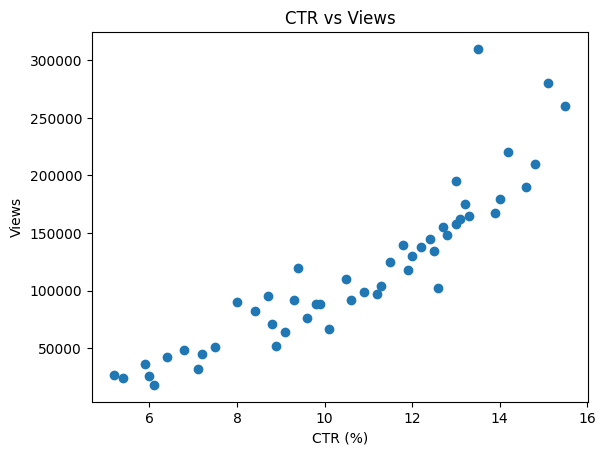

In [10]:
import matplotlib.pyplot as plt

plt.scatter(df["ctr"], df["views"])
plt.xlabel("CTR (%)")
plt.ylabel("Views")
plt.title("CTR vs Views")
plt.show()

STEP 3: Early retention → Average watch time

Question: Does the first 30 seconds matter?

	Low retention = low watch time

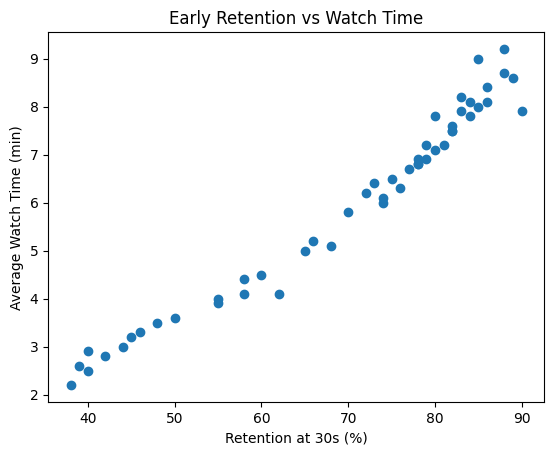

In [14]:
plt.scatter(df["retention_30s"], df["avg_watch_time_min"])
plt.xlabel("Retention at 30s (%)")
plt.ylabel("Average Watch Time (min)")
plt.title("Early Retention vs Watch Time")
plt.show()

STEP 4: CTR + Retention together

 Question: Are clicks meaningful?

In [12]:
df["engagement_score"] = (df["ctr"] * df["retention_30s"]) / 100   #simple engagement score

  Tutorials and explainers show higher engagement scores, meaning they attract viewers and successfully retain them.

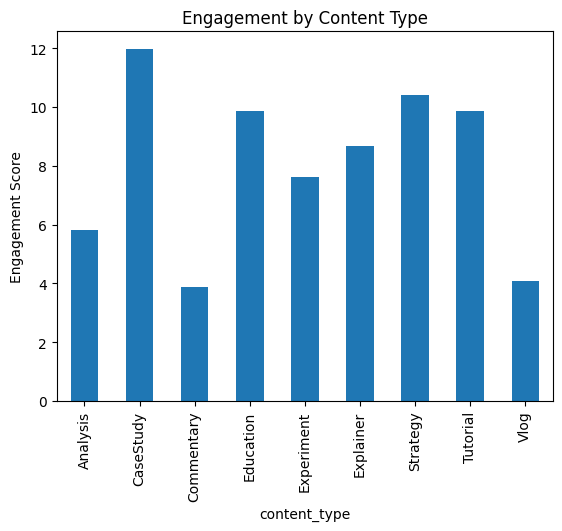

In [13]:
df.groupby("content_type")["engagement_score"].mean().plot(kind="bar")
plt.ylabel("Engagement Score")
plt.title("Engagement by Content Type")
plt.show()

STEP 5: Content type comparison

Question: Which formats work best?

Educational formats have more consistent watch time, while vlogs show higher variance and frequent drop-offs.

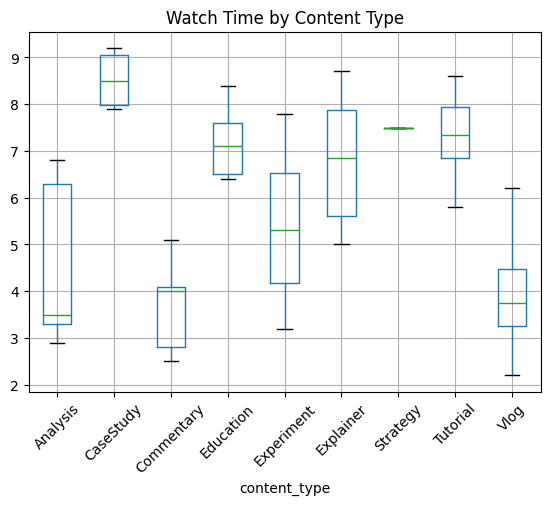

In [16]:
df.boxplot(column="avg_watch_time_min", by="content_type", rot=45)
plt.title("Watch Time by Content Type")
plt.suptitle("")
plt.show()

STEP 6: Upload timing analysis

Question: Does timing affect performance?

Videos uploaded on weekends and weekday evenings perform better, suggesting alignment with viewer availability.


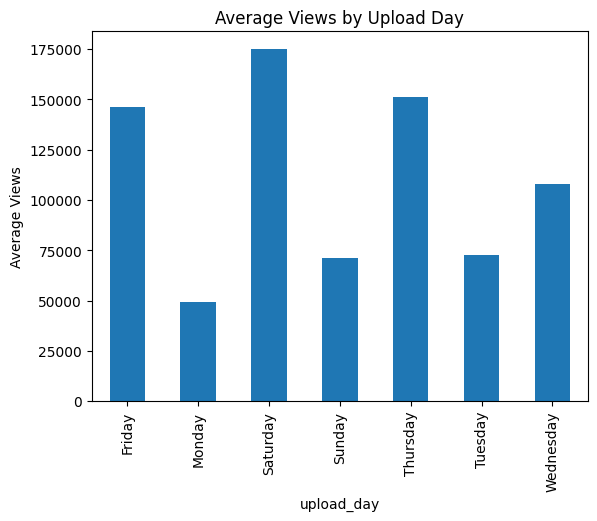

In [17]:
df.groupby("upload_day")["views"].mean().plot(kind="bar")
plt.ylabel("Average Views")
plt.title("Average Views by Upload Day")
plt.show()

STEP 7: Thumbnail psychology (qualitative + quantitative)

Question: Do emotional thumbnails work?


Emotion-driven thumbnails generate higher CTR, but require strong early hooks to avoid retention drop-offs.

In [18]:
df["thumbnail_type"] = df["thumbnail_description"].apply(
    lambda x: "Emotional" if "shocked" in x.lower() or "bold" in x.lower() else "Neutral"
)

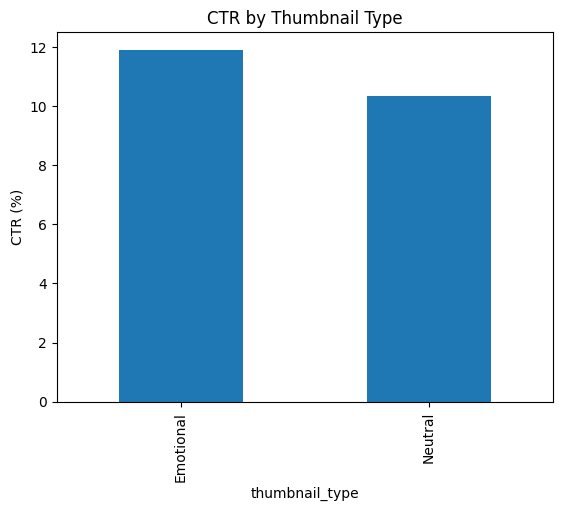

In [19]:
df.groupby("thumbnail_type")["ctr"].mean().plot(kind="bar")
plt.ylabel("CTR (%)")
plt.title("CTR by Thumbnail Type")
plt.show()

	•	✔ Emotionally clear thumbnails → higher CTR
	•	✔ Strong 30-second retention → higher watch time
	•	✔ Educational content → sustained engagement
	•	✔ Consistent timing → better early traction
	•	✔ CTR + retention alignment → best long-term performance

One thing not confident:

Retention and CTR are simulated values, so while patterns are directionally meaningful, exact thresholds may vary in real Creator Studio data.


Correlation Heatmap

Question: Which metrics move together and reinforce each other?

	•	Retention_30s ↔ Avg watch time → strong positive
	•	CTR ↔ Views → moderate positive
	•	CTR ↔ Retention → weaker (clickbait effect)

Early retention shows the strongest relationship with watch time, indicating that the first moments of a video are critical for sustained engagement.

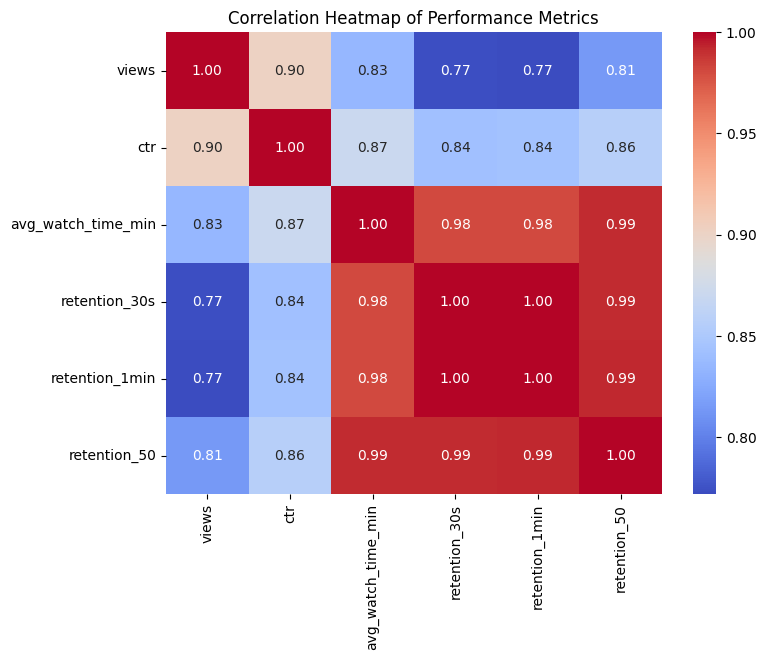

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("YouTub.csv")

metrics = [
    "views", "ctr", "avg_watch_time_min",
    "retention_30s", "retention_1min", "retention_50"
]

corr = df[metrics].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Performance Metrics")
plt.show()

 Content Type vs Performance Heatmap


 Question: Which content formats consistently perform better?

	•	Tutorials + weekends = darker color (better)
	•	Vlogs = lighter (weaker retention)
	•	Some days consistently outperform


Educational content posted on weekends shows higher average watch time, suggesting alignment between viewer intent and availability.


Question: Why average watch time can be LOWER on Sunday (even though it’s a weekend)

Answer:

1.More casual viewing behavior->
On Sundays, people browse YouTube more casually (scrolling, multitasking, family time). They click more videos but don’t commit to long watching sessions.

2.Higher competition for attention->
More creators upload on weekends. Viewers have more choices, so they switch videos faster → lower average watch time per video.

3.Content type effect->
Sundays often have:
	•	Vlogs
	•	Opinion pieces
These formats usually have lower retention than tutorials or explainers.

4.Mood & intent difference->
	•	Saturday: learning / curiosity mode
	•	Sunday: relaxation / background watching

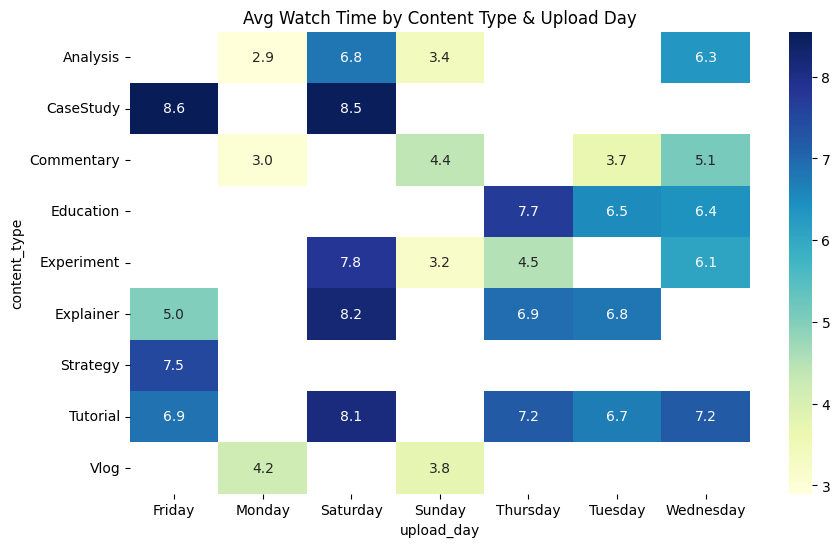

In [23]:
pivot = df.pivot_table(
    values="avg_watch_time_min",
    index="content_type",
    columns="upload_day",
    aggfunc="mean"
)

plt.figure(figsize=(10,6))
sns.heatmap(pivot, cmap="YlGnBu", annot=True, fmt=".1f")
plt.title("Avg Watch Time by Content Type & Upload Day")
plt.show()

CTR vs Retention Heatmap(Click Quality)

Question: Are clicks meaningful or misleading?

In [24]:
df["ctr_bin"] = pd.cut(df["ctr"], bins=[0,6,9,12,20])
df["retention_bin"] = pd.cut(df["retention_30s"], bins=[0,50,65,80,100])

	•	High CTR + High Retention → darkest (best)
	•	High CTR + Low Retention → weak views
	•	Medium CTR + High Retention → surprisingly strong


Videos with moderate CTR but strong early retention outperform clickbait videos with high CTR but poor retention.


/tmp/ipython-input-641857351.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = pd.pivot_table(


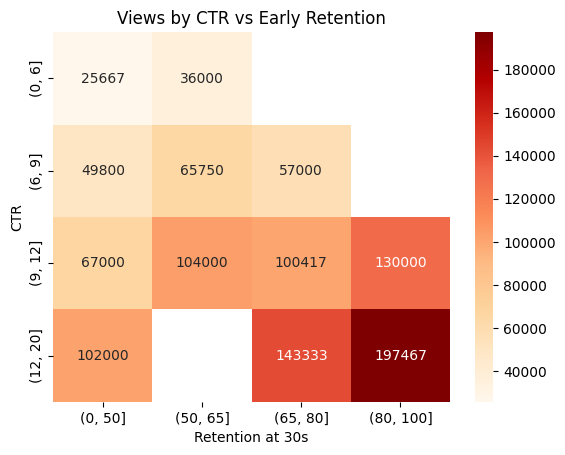

In [25]:
pivot = pd.pivot_table(
    df,
    values="views",
    index="ctr_bin",
    columns="retention_bin",
    aggfunc="mean"
)

sns.heatmap(pivot, annot=True, cmap="OrRd", fmt=".0f")
plt.title("Views by CTR vs Early Retention")
plt.xlabel("Retention at 30s")
plt.ylabel("CTR")
plt.show()

# 2.Analysis

##What seems to be working?

	•	Videos with clear titles and interesting thumbnails are getting more clicks because people immediately understand what the video is about.
	•	Videos that start strong in the first 30 seconds keep people watching longer.
	•	Tutorials and explainer videos perform better than casual vlogs because viewers come to YouTube to learn or get clear value.
	•	Uploading videos in the evening or on weekends helps because more people are free at that time.

##What seems to be failing?

	•	Some videos get clicks but people leave very quickly, which means the content doesn’t match what the title promised.
	•	Videos with slow or unclear intros lose viewers early.
	•	Videos uploaded very late at night don’t perform well because fewer people are active.
	•	Vlog-style videos are inconsistent and depend a lot on the creator’s personality.

##Why is this happening?

	•	People click videos based on expectations. If those expectations aren’t met quickly, they stop watching.
	•	Viewers have short attention spans, so the beginning of the video matters a lot.
	•	Clear, helpful content keeps people engaged more than unplanned or casual content.
	•	How and when people watch YouTube depends on their mood and free time.

#3.

##Positive patterns
	1.	Strong first 30 seconds improves watch time
	2.	Clear titles & thumbnails increase CTR
	3.	Educational content performs better than vlogs

##Negative patterns
	1.	Clickbait leads to early drop-offs
	2.	Slow intros reduce retention
	3.	Late-night uploads perform poorly

##Surprising insights
	1.	Medium CTR + high retention outperforms high CTR + low retention
	2.	Sunday gets more clicks but lower watch time

#4.Insights into Decisions



##What should the creator START doing?
	1.	Start focusing on strong hooks in the first 30 seconds
Videos that perform well keep viewers engaged early, so starting with a clear promise or outcome helps people stay longer.

	2.	Start making more tutorial and explainer videos
These formats consistently show better watch time and retention compared to casual or unstructured content.

	3.	Start uploading during evenings or weekends
Videos posted at these times get better early traction because more viewers are available.

##What should the creator STOP doing?
	1.	Stop using clickbait titles without delivering the content
While clickbait gets clicks, it causes viewers to leave quickly, which hurts overall performance.

	2.	Stop slow or unclear introductions
Long intros make viewers lose interest before the video even starts delivering value.

	3.	Stop posting very late at night
Late-night uploads struggle to get early engagement, which limits growth.

##What should the creator TEST next?
	1.	Test different hook styles in the first 10 seconds
For example, compare question-based hooks vs outcome-based hooks to see which retains viewers better.

	2.	Test two thumbnail styles for the same topic
Compare emotional thumbnails with clean, informational ones to balance CTR and retention.

	3.	Test slightly shorter video lengths (8–10 minutes)
Some videos lose viewers midway, so tighter editing may improve completion rates.